In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets

# metadata
print(car_evaluation.metadata)

# variable information
print(car_evaluation.variables)


{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and their Applications, 

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OrdinalEncoder

from sklearn import metrics
from sklearn import tree
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [5]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [6]:
y

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1723,good
1724,vgood
1725,unacc
1726,good


In [7]:
df = pd.concat([X, y], axis=1)
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [31]:
data = df.copy()

In [32]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [33]:
ordinal_columns = []

for col in df:
  print(df[col].value_counts())
  print("\n")
  if col != "class":
    ordinal_columns.append(col)

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64


maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64


doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64


persons
2       576
4       576
more    576
Name: count, dtype: int64


lug_boot
small    576
med      576
big      576
Name: count, dtype: int64


safety
low     576
med     576
high    576
Name: count, dtype: int64


class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64




In [34]:
ordinal_columns

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [35]:
encoder = OrdinalEncoder()
df[ordinal_columns] = encoder.fit_transform(df[ordinal_columns])
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,1.0,unacc
1,3.0,3.0,0.0,0.0,2.0,2.0,unacc
2,3.0,3.0,0.0,0.0,2.0,0.0,unacc
3,3.0,3.0,0.0,0.0,1.0,1.0,unacc
4,3.0,3.0,0.0,0.0,1.0,2.0,unacc
...,...,...,...,...,...,...,...
1723,1.0,1.0,3.0,2.0,1.0,2.0,good
1724,1.0,1.0,3.0,2.0,1.0,0.0,vgood
1725,1.0,1.0,3.0,2.0,0.0,1.0,unacc
1726,1.0,1.0,3.0,2.0,0.0,2.0,good


In [38]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="class"), df["class"], test_size=0.2, random_state=42)

In [55]:
params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10, 25],
    'criterion': ['gini', 'entropy', 'log_loss']
}

tree_cl = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5)
tree_cl.fit(X_train, y_train)

print("Best params (Decision Tree):", tree_cl.best_params_)

Best params (Decision Tree): {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}


In [64]:
tree_cl.best_estimator_

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [56]:
tree_cl_y = tree_cl.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, tree_cl_y))
print("Precision:", precision_score(y_test,tree_cl_y, average='weighted'))
print("Recall:", recall_score(y_test, tree_cl_y, average='weighted'))
print("F1-score:", f1_score(y_test, tree_cl_y, average='weighted'))

Accuracy: 0.9739884393063584
Precision: 0.9790492258957527
Recall: 0.9739884393063584
F1-score: 0.9754170712466095


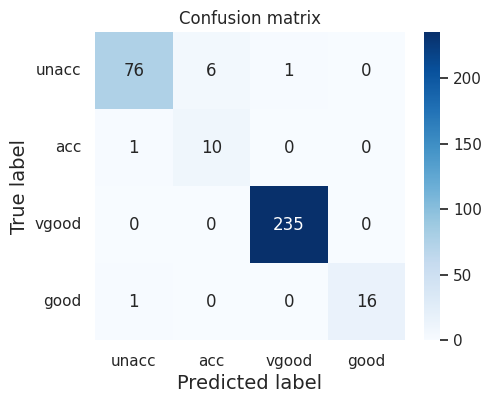

In [57]:
feature_names = X.columns
labels = df["class"].unique()

fig = plt.figure(figsize=(5,4))
ax = plt.axes()

confusion_matrix = metrics.confusion_matrix(y_test, tree_cl_y)
matrix_df = pd.DataFrame(confusion_matrix)

sns.set(font_scale=1)

sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="Blues")

ax.set_title('Confusion matrix')
ax.set_xlabel("Predicted label", fontsize =14)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True label", fontsize=14)

ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [58]:
text_representation = tree.export_text(tree_cl.best_estimator_)
print(text_representation)

|--- feature_3 <= 0.50
|   |--- class: unacc
|--- feature_3 >  0.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_0 <= 2.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |   |   |   |--- class: unacc
|   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |--- class: acc
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- class: unacc
|   |   |   |--- feature_0 >  0.50
|   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |   |   |--- feature

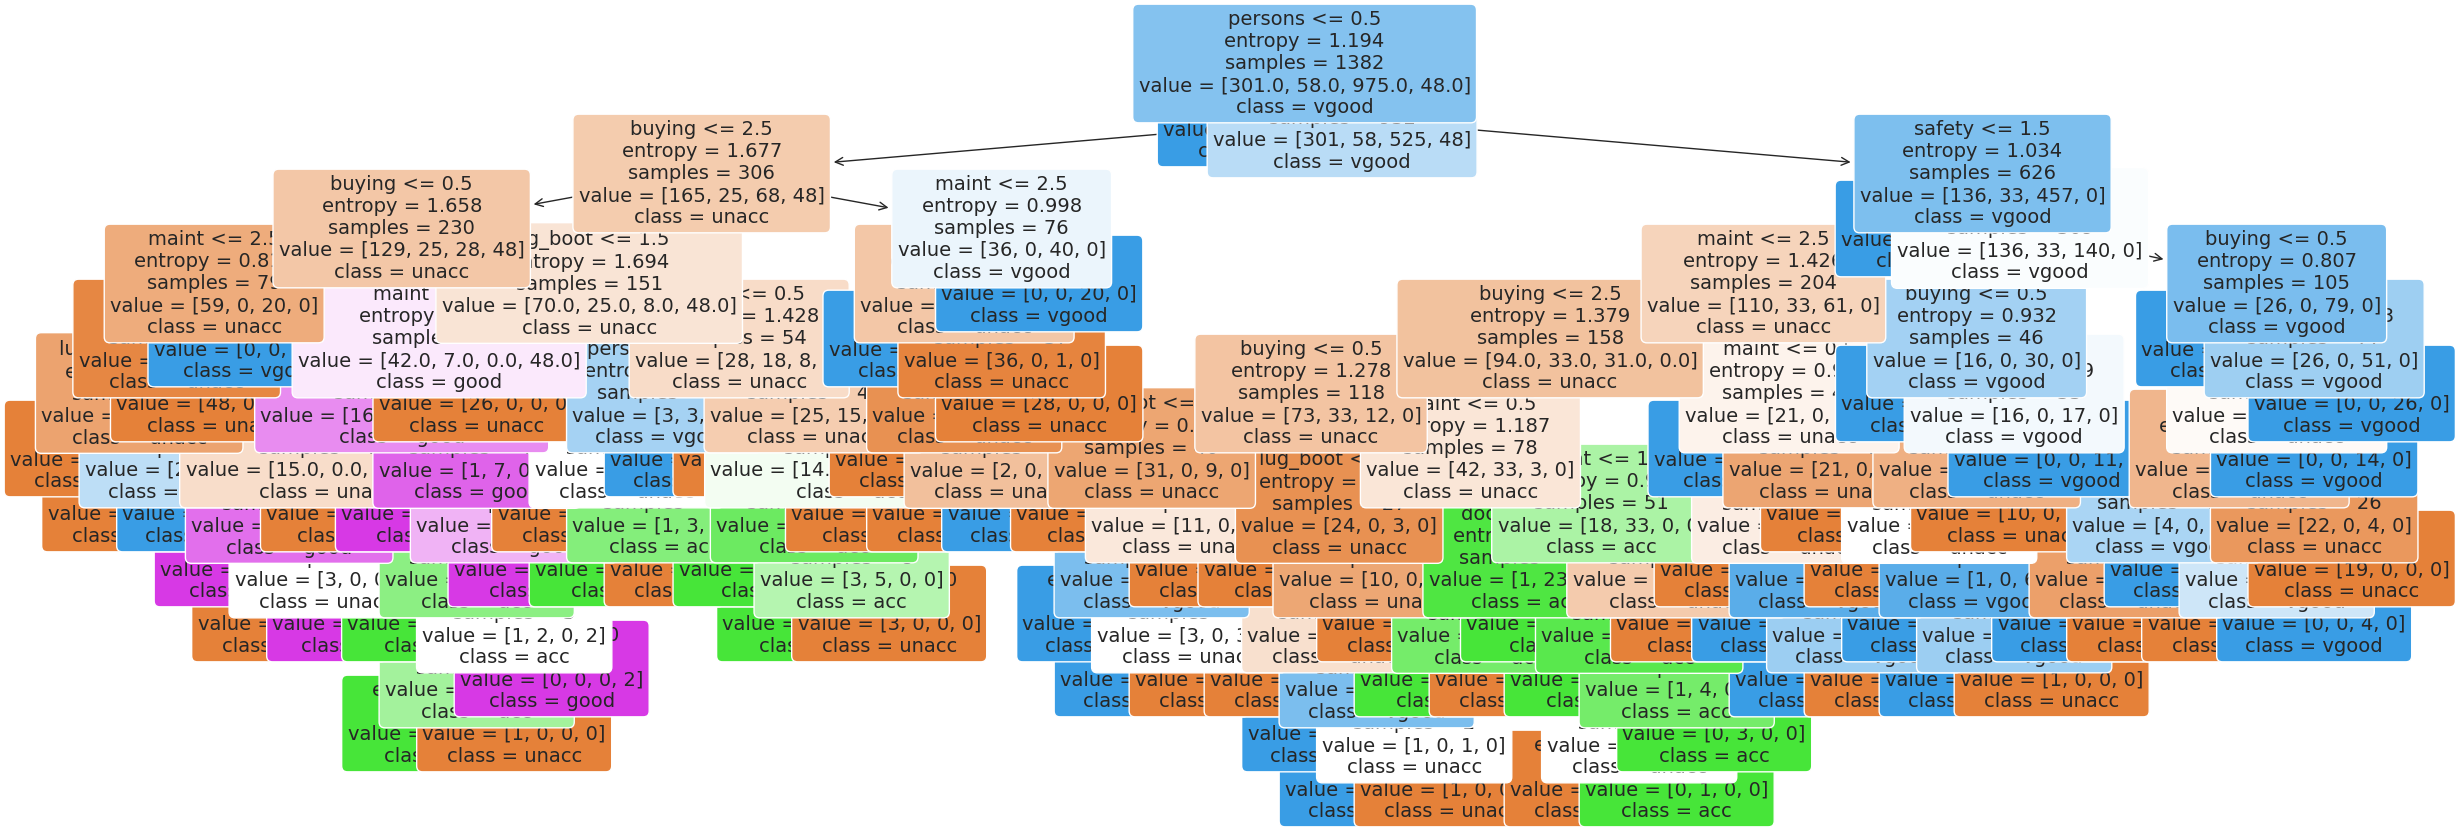

In [59]:
fig = plt.figure(figsize=(30,10))
a = tree.plot_tree(tree_cl.best_estimator_,
                   feature_names = feature_names,
                   class_names = labels,
                   rounded = True, filled = True, fontsize=14)

In [62]:
params = {
    'n_estimators': [50, 100, 160],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

rf_cl = GridSearchCV(RandomForestClassifier(random_state=42), params, cv=5)
rf_cl.fit(X_train, y_train)

print("Best params (Random Forest):", rf_cl.best_params_)

Best params (Random Forest): {'bootstrap': True, 'max_features': None, 'n_estimators': 100}


In [63]:
rf_cl.best_estimator_

RandomForestClassifier(max_features=None, random_state=42)

In [65]:
rf_cl_y = rf_cl.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, rf_cl_y))
print("Precision:", precision_score(y_test, rf_cl_y, average='weighted'))
print("Recall:", recall_score(y_test, rf_cl_y, average='weighted'))
print("F1-score:", f1_score(y_test, rf_cl_y, average='weighted'))

Accuracy: 0.976878612716763
Precision: 0.9820050120728763
Recall: 0.976878612716763
F1-score: 0.9784226335286067


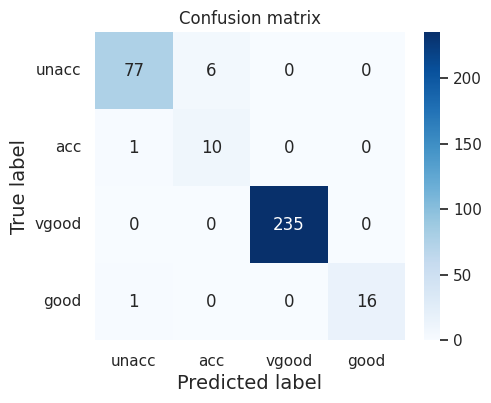

In [66]:
feature_names = X.columns
labels = df["class"].unique()

fig = plt.figure(figsize=(5,4))
ax = plt.axes()

confusion_matrix = metrics.confusion_matrix(y_test, rf_cl_y)
matrix_df = pd.DataFrame(confusion_matrix)

sns.set(font_scale=1)

sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="Blues")

ax.set_title('Confusion matrix')
ax.set_xlabel("Predicted label", fontsize =14)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True label", fontsize=14)

ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

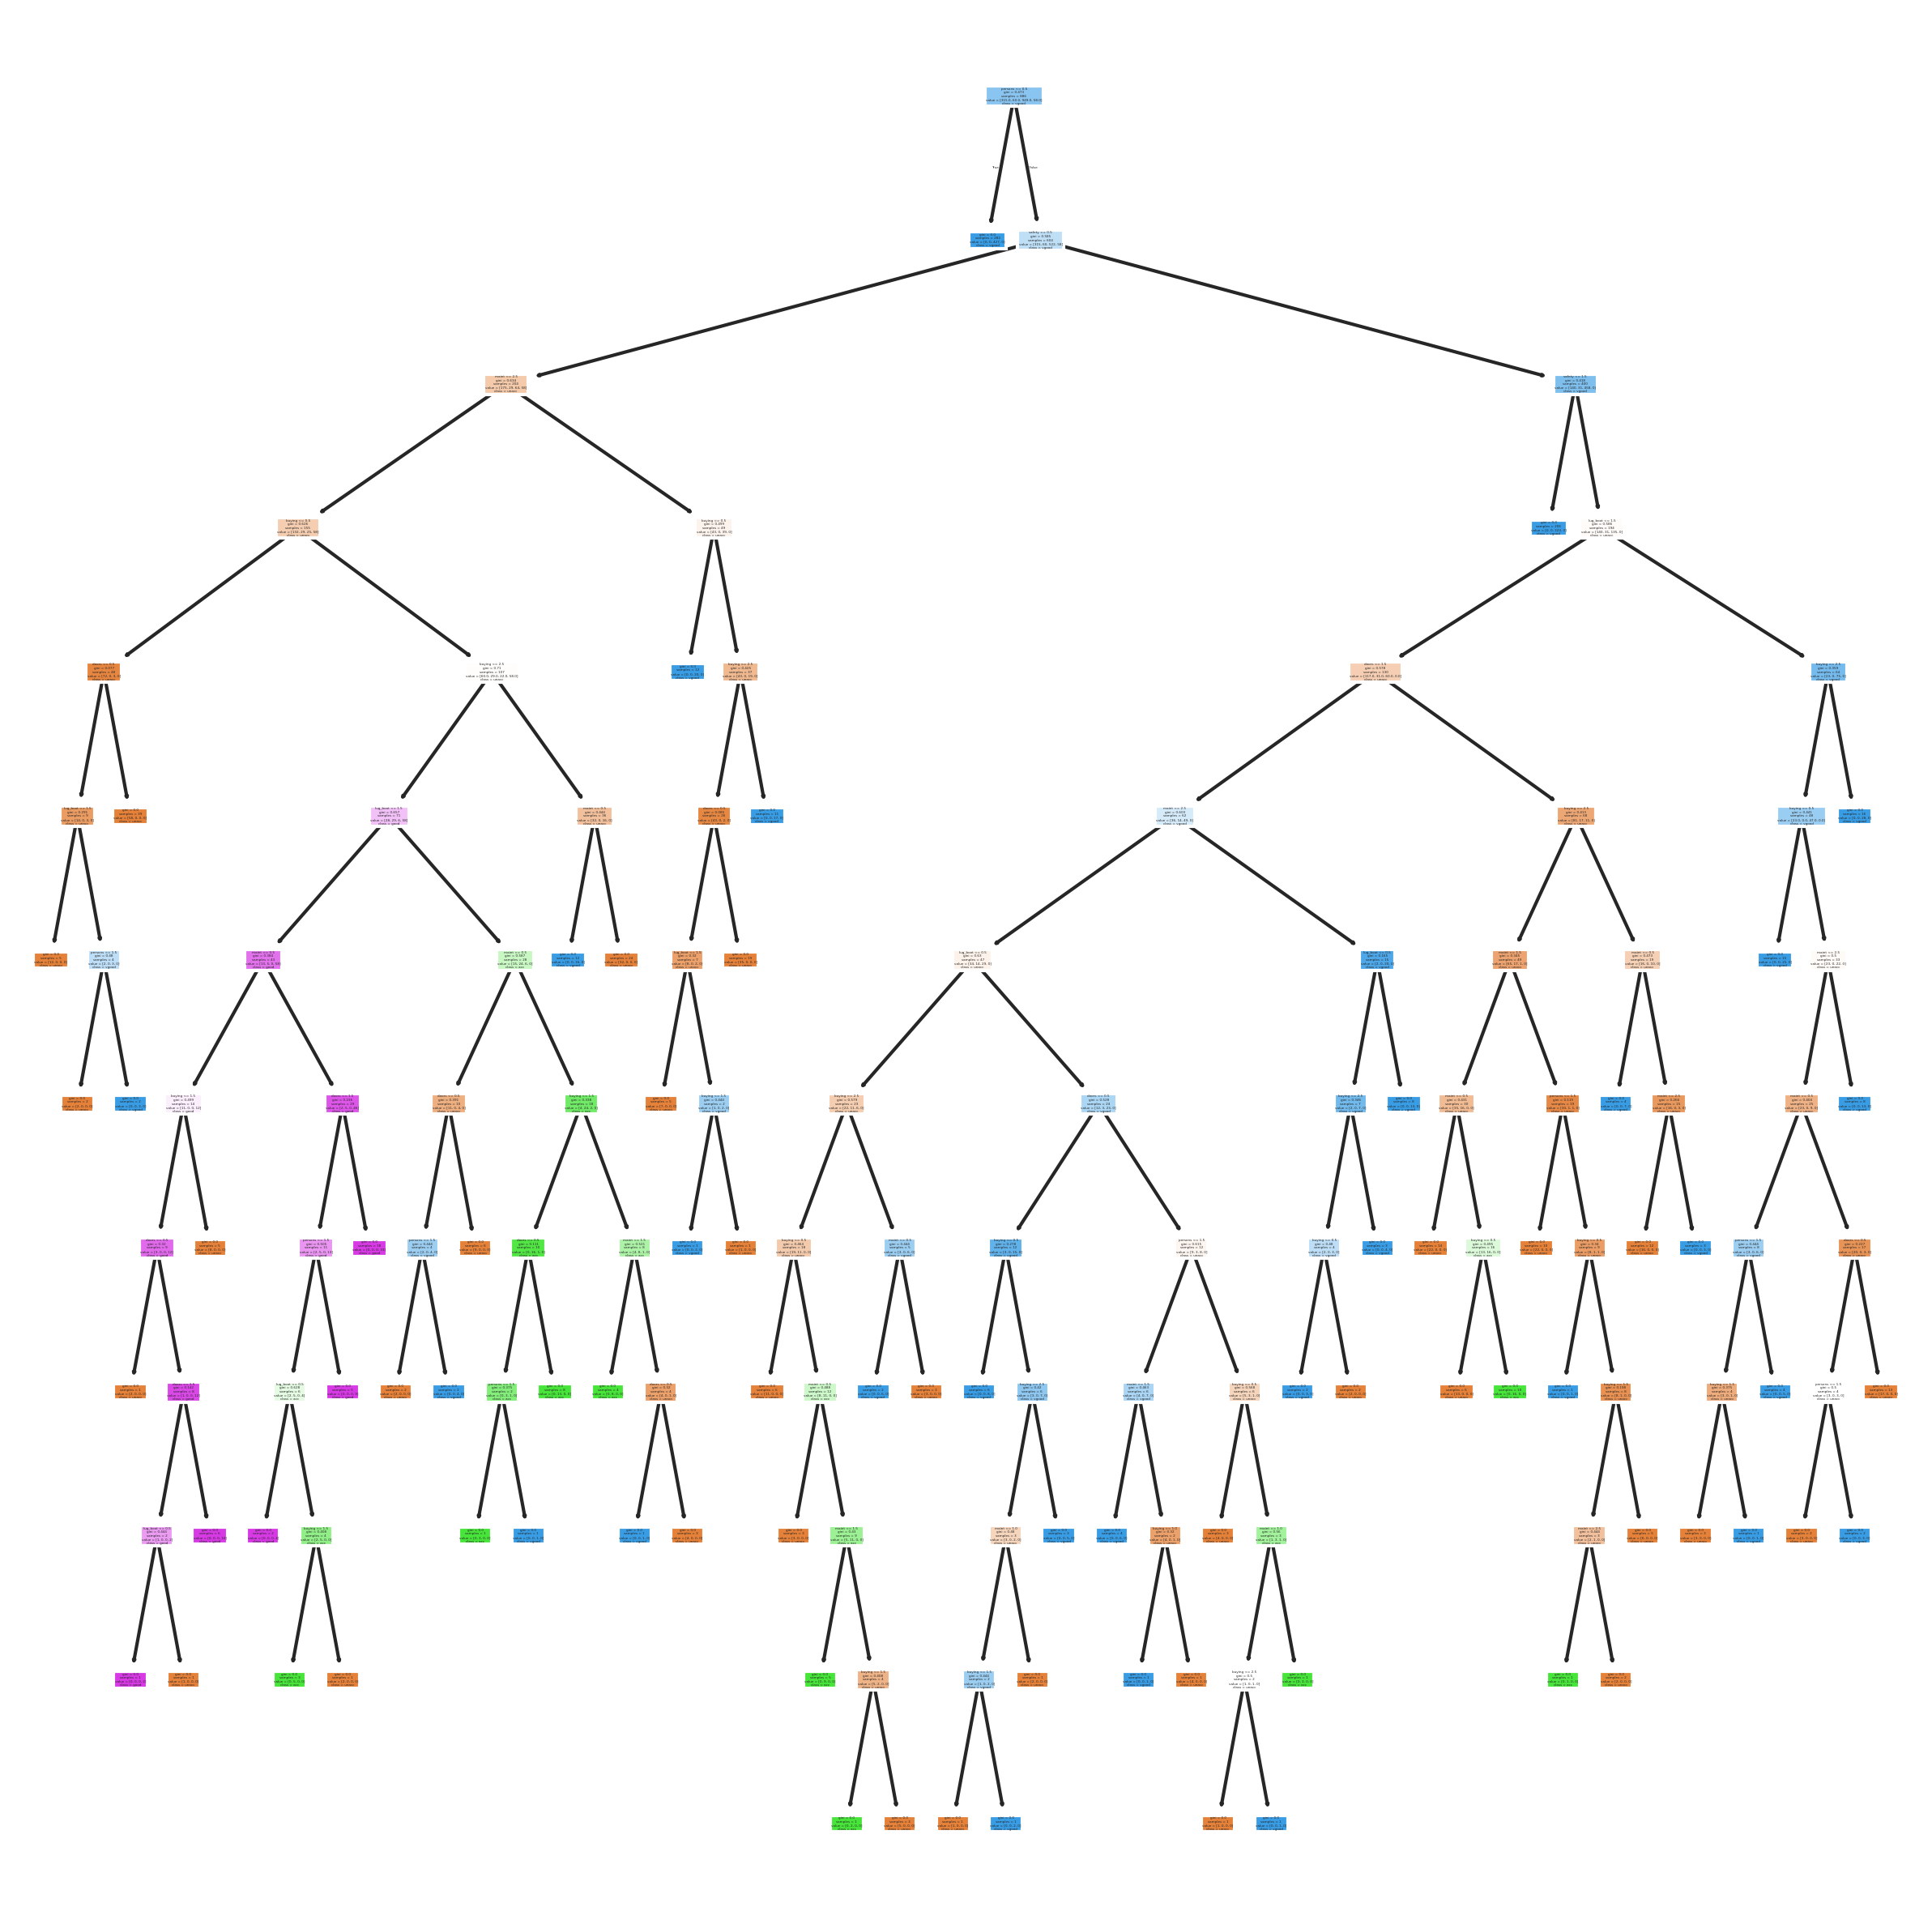

In [72]:
fn= ordinal_columns
cn= df['class'].unique()

fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize = (10, 10), dpi=300)

#first tree
tree.plot_tree(rf_cl.best_estimator_.estimators_[0], feature_names = fn, class_names=cn, filled = True);

In [12]:
ordinal_columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [13]:
encoder = OrdinalEncoder()
df[ordinal_columns + ["class"]] = encoder.fit_transform(df[ordinal_columns + ["class"]])
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,1.0,2.0
1,3.0,3.0,0.0,0.0,2.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0,2.0
3,3.0,3.0,0.0,0.0,1.0,1.0,2.0
4,3.0,3.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...
1723,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1724,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1725,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1726,1.0,1.0,3.0,2.0,0.0,2.0,1.0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="class"), df["class"], test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
def build_model(input_dim, output_dim, hidden_layers, activation, learning_rate):
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation=activation, input_dim=input_dim))
    model.add(Dropout(0.2))

    for units in hidden_layers[1:]:
        model.add(Dense(units, activation=activation))
        model.add(Dropout(0.2))

    model.add(Dense(output_dim, activation='softmax'))
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

    return model

In [30]:
param_grid = [
    {'hidden_layers': [32], 'activation': 'relu', 'learning_rate': 0.001},
    {'hidden_layers': [64, 32], 'activation': 'relu', 'learning_rate': 0.001},
    {'hidden_layers': [64, 32], 'activation': 'tanh', 'learning_rate': 0.01},
    {'hidden_layers': [128, 64, 32], 'activation': 'relu', 'learning_rate': 0.01},
]

In [33]:
input_dim = X_train_scaled.shape[1]
output_dim = len(np.unique(df["class"]))

for params in param_grid:
    print(f"Training with {params}")

    model = build_model(input_dim, output_dim,
                        hidden_layers=params['hidden_layers'],
                        activation=params['activation'],
                        learning_rate=params['learning_rate'])

    print(model.summary())

    model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2)

    y_pred = np.argmax(model.predict(X_test_scaled), axis=1)
    #y_pred = model.predict(X_test_scaled).flatten()

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
    print("\n")

Training with {'hidden_layers': [32], 'activation': 'relu', 'learning_rate': 0.001}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356 (1.39 KB)

 Trainable params: 356 (1.39 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2373 - loss: 1.4307 - val_accuracy: 0.4910 - val_loss: 1.1840
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5117 - loss: 1.1372 - val_accuracy: 0.6534 - val_loss: 1.0103
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6881 - loss: 0.9291 - val_accuracy: 0.6643 - val_loss: 0.9099
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7216 - loss: 0.8171 - val_accuracy: 0.6643 - val_loss: 0.8503
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7113 - loss: 0.7641 - val_accuracy: 0.6606 - val_loss: 0.8108
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7327 - loss: 0.7201 - val_accuracy: 0.6643 - val_loss: 0.7822
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7272 - loss: 0.6827 - val_accuracy: 0.6715 - val_loss: 0.7579
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7487 - loss: 0.6487 - val_accuracy: 0.6751 - val_

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,660 (10.39 KB)

 Trainable params: 2,660 (10.39 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3976 - loss: 1.2958 - val_accuracy: 0.6498 - val_loss: 0.9242
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7192 - loss: 0.8337 - val_accuracy: 0.6498 - val_loss: 0.8164
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7214 - loss: 0.7111 - val_accuracy: 0.6570 - val_loss: 0.7748
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7382 - loss: 0.6388 - val_accuracy: 0.6643 - val_loss: 0.7471
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7567 - loss: 0.6143 - val_accuracy: 0.6715 - val_loss: 0.7216
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7191 - loss: 0.6370 - val_accuracy: 0.6787 - val_loss: 0.7008
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7177 - loss: 0.6365 - val_accuracy: 0.6823 - val_loss: 0.6787
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7352 - loss: 0.5718 - val_accuracy: 0.7184 - val

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,660 (10.39 KB)

 Trainable params: 2,660 (10.39 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5618 - loss: 1.0628 - val_accuracy: 0.6715 - val_loss: 0.8091
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7426 - loss: 0.6606 - val_accuracy: 0.6859 - val_loss: 0.7203
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7441 - loss: 0.6363 - val_accuracy: 0.7401 - val_loss: 0.6025
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7881 - loss: 0.5164 - val_accuracy: 0.7545 - val_loss: 0.5706
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7849 - loss: 0.4898 - val_accuracy: 0.7798 - val_loss: 0.5357
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7973 - loss: 0.4728 - val_accuracy: 0.7726 - val_loss: 0.5317
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7934 - loss: 0.4763 - val_accuracy: 0.7978 - val_loss: 0.4782
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8161 - loss: 0.4361 - val_accuracy: 0.7834 - val_

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,364 (44.39 KB)

 Trainable params: 11,364 (44.39 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6002 - loss: 0.9267 - val_accuracy: 0.6498 - val_loss: 0.6955
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7500 - loss: 0.5849 - val_accuracy: 0.7798 - val_loss: 0.4990
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8290 - loss: 0.4287 - val_accuracy: 0.8195 - val_loss: 0.3921
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8551 - loss: 0.3624 - val_accuracy: 0.8267 - val_loss: 0.3767
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8759 - loss: 0.3095 - val_accuracy: 0.8412 - val_loss: 0.3365
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8920 - loss: 0.2538 - val_accuracy: 0.8231 - val_loss: 0.3161
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8800 - loss: 0.2708 - val_accuracy: 0.9025 - val_loss: 0.2094
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8879 - loss: 0.2502 - val_accuracy: 0.8303 - val

Најдобри резултати имаше Random Forest Classifier - от, но тука некаде се со Decision Tree Classifier и невронската мрежа со параметрите [ 'hidden_layers': [128, 64, 32], 'activation': 'relu', 'learning_rate': 0.01 ]. Тоа е бидејќи податочното множество е многу мало (околу 1700 редици), а знаеме дека невронските мрежи најдобри резултати даваат кога се тренирани на множества со голем број податоци. Исто така, невронските мрежи со помалку скриени слоеви имаа полоши резултати. Во склоп на тоа, Random Forest Classifier и Decision Tree Classifier може да се многу overfitted и затоа да даваат малку подобри резултати, додека во невронската мрежа имаме dropout за да го спречиме овој момент.